# CS677 – Introduction to Machine Learning (CRN: 27964) 
##### Project-1 


In [2]:
pip install yfinance

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
import datetime
start_date = datetime.datetime(2015, 1, 1)
end_date = datetime.datetime(2022, 12, 31)
data = yf.download('AAPL', start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [6]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.498686,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.808514,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.810753,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.144634,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.072323,237458000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2014 entries, 2015-01-02 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2014 non-null   float64
 1   High       2014 non-null   float64
 2   Low        2014 non-null   float64
 3   Close      2014 non-null   float64
 4   Adj Close  2014 non-null   float64
 5   Volume     2014 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 110.1 KB


## Data Cleaning

In [8]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

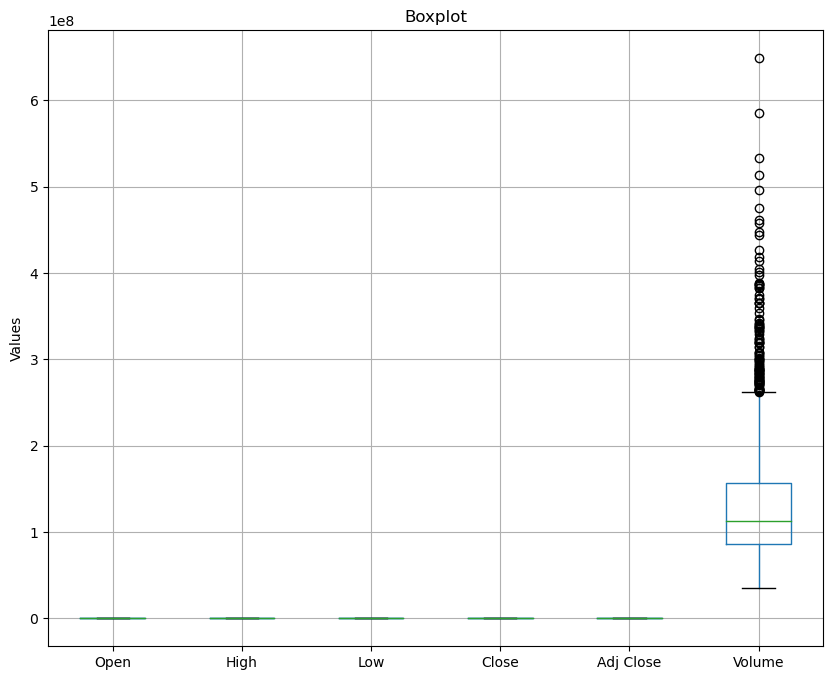

In [9]:
plt.figure(figsize=(10, 8))
data.boxplot()
plt.title('Boxplot')
plt.ylabel('Values')
plt.show()

In [10]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column >= lower_bound) & (column <= upper_bound)]
data[['Volume']] = data[['Volume']].apply(remove_outliers)

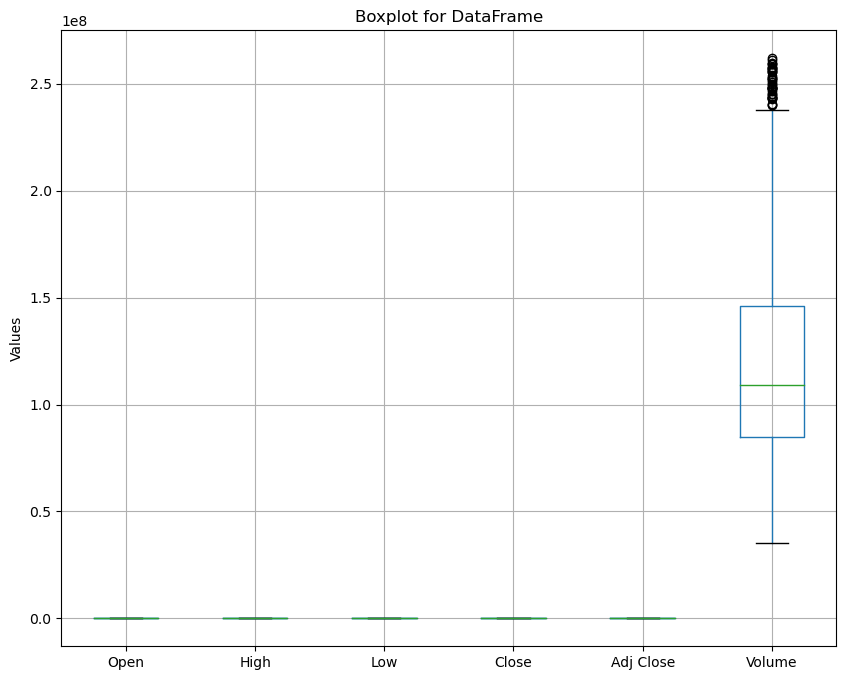

In [11]:
plt.figure(figsize=(10, 8))
data.boxplot()
plt.title('Boxplot for DataFrame')
plt.ylabel('Values')
plt.show()

## Time Series EDA

<Axes: xlabel='Date'>

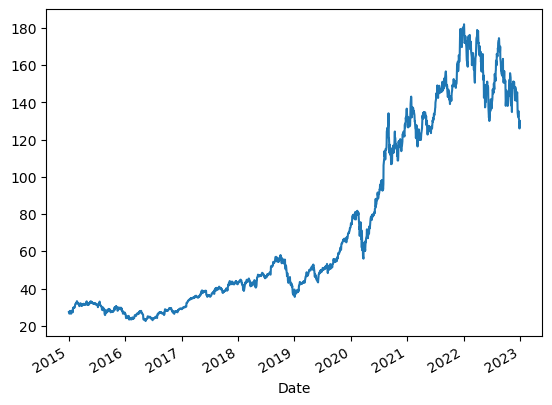

In [12]:
data['Close'].plot()

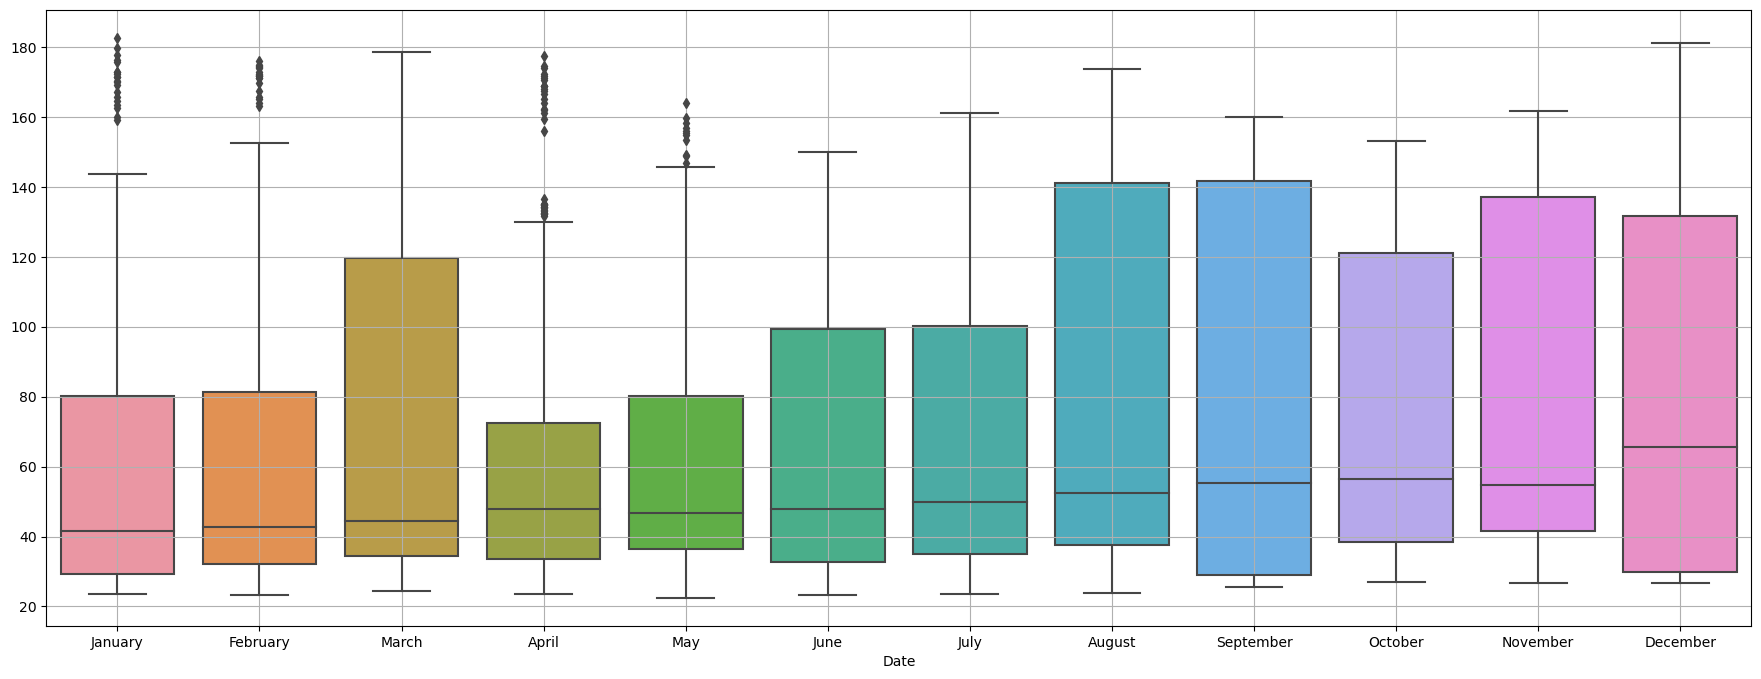

In [13]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = data.index.month_name(),y = data.values[:,0],ax=ax)
plt.grid();

In [14]:
monthly_price_across_years = pd.pivot_table(data, values = 'Close', columns = data.index.month_name(), index = data.index.year)
monthly_price_across_years

Date,April,August,December,February,January,July,June,March,May,November,October,September
Date,,,,,,,,,,,,
2015,31.822857,28.348691,27.931705,31.358026,27.660375,31.333864,31.951704,31.492727,32.190375,29.540625,28.340000,28.199405
2016,26.684762,26.916305,28.583929,23.936625,24.607237,24.639125,24.155568,26.066818,23.743690,27.538571,28.926786,27.714286
2017,35.721710,39.755326,42.972875,33.428552,29.892500,37.074875,36.957840,35.154457,38.056932,43.101548,39.454318,39.402125
2018,42.458572,53.336522,41.066579,41.909737,43.501309,47.577857,47.155357,43.624048,46.384205,47.808929,55.211413,55.518421
2019,50.129048,51.239432,69.131428,42.931973,38.541548,51.304091,48.242250,45.823453,47.818409,65.630126,58.821630,54.498750
2020,68.096547,117.299762,127.290455,77.817631,77.979048,95.566250,86.451590,65.611023,77.496376,116.825999,116.413182,115.125237
2021,131.812858,148.177727,173.552727,131.531579,133.036842,145.139524,129.958636,121.871304,126.784000,154.255716,145.563809,148.306190
2022,166.820999,166.885218,137.876666,169.830001,169.861500,149.670499,139.798573,165.310435,148.430477,145.843331,145.013333,153.002856


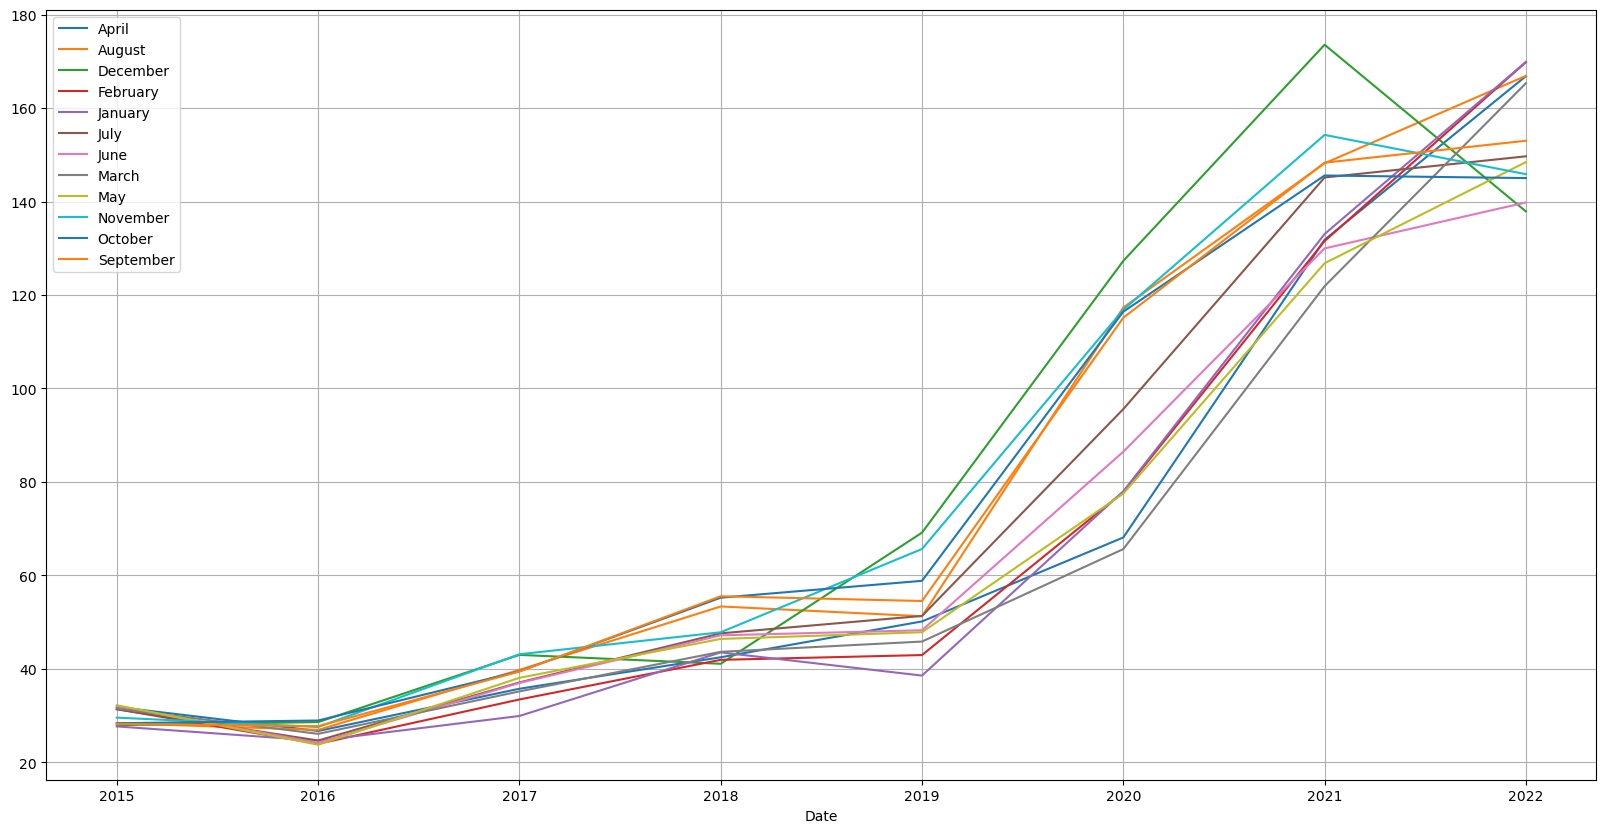

In [15]:
monthly_price_across_years.plot(figsize=(20,10))
plt.grid()
plt.legend(loc='best');

In [16]:
# Visualise Pattern in the Dataset
from statsmodels.tsa.seasonal import seasonal_decompose
import plotly.graph_objects as go

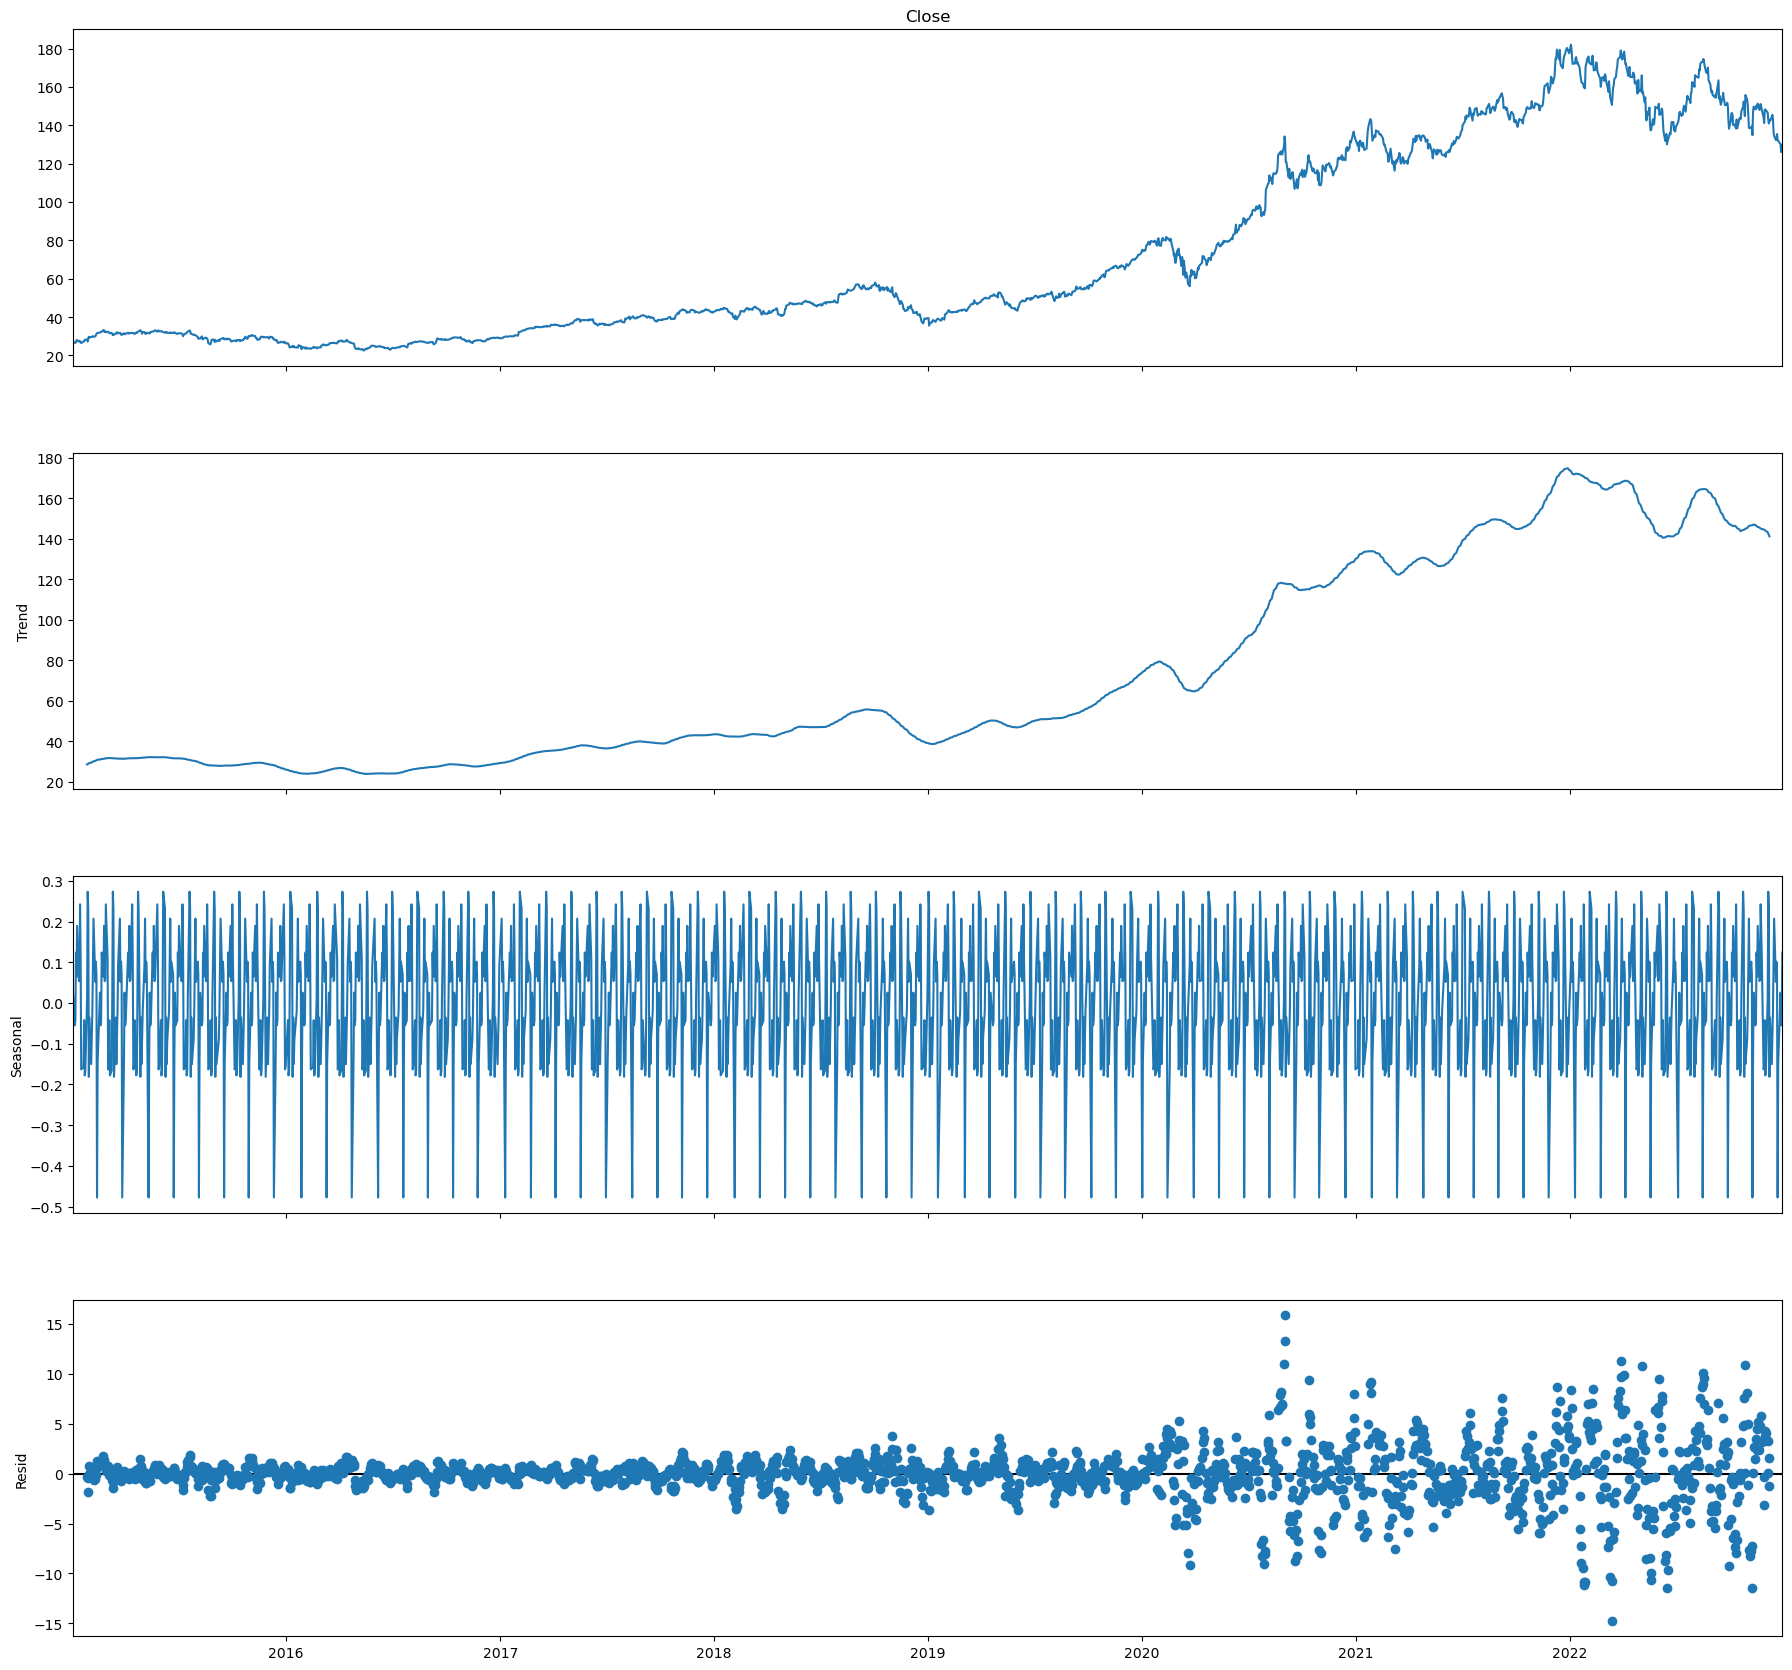

In [40]:
result2 = seasonal_decompose(data['Close'], model='additive', period = 30)
fig2 = go.Figure()  
fig2 = result2.plot()  
fig2.set_size_inches(20, 19)

## New Column creation for next day's closing price

In [28]:
data['Next_Close'] = data['Close'].shift(-1)

In [29]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Next_Close,Signal_Strategy1,50_MA,200_MA,Signal_Strategy2
Date,,,,,,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.498686,212818400.0,26.562500,-1,NaN,NaN,-1
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.808514,257142000.0,26.565001,1,NaN,NaN,-1
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.810753,NaN,26.937500,1,NaN,NaN,-1
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.144634,160423600.0,27.972500,1,NaN,NaN,-1
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.072323,237458000.0,28.002501,1,NaN,NaN,-1


## Generating target variable for Strategy-1

In [30]:
data['Signal_Strategy1'] = np.where(data['Next_Close'] > data['Close'], 1, -1)

## Generate moving averages and target variable for Strategy-2

In [31]:
data['50_MA'] = data['Close'].rolling(window=50).mean()
data['200_MA'] =data['Close'].rolling(window=200).mean()
data['Signal_Strategy2'] = np.where(data['50_MA'] > data['200_MA'], 1, -1)

In [32]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,Next_Close,Signal_Strategy1,50_MA,200_MA,Signal_Strategy2
Date,,,,,,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.498686,212818400.0,26.562500,-1,NaN,NaN,-1
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.808514,257142000.0,26.565001,1,NaN,NaN,-1
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.810753,NaN,26.937500,1,NaN,NaN,-1
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.144634,160423600.0,27.972500,1,NaN,NaN,-1
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.072323,237458000.0,28.002501,1,NaN,NaN,-1


In [33]:
Drop_values = ['Close','50_MA', '200_MA']
X = data[Drop_values].dropna()
y1 = X['Close'].shift(-1) > X['Close']
y2 = X['50_MA'] > X['200_MA']

## Plotting Data stock with 50 and 200 day moving average

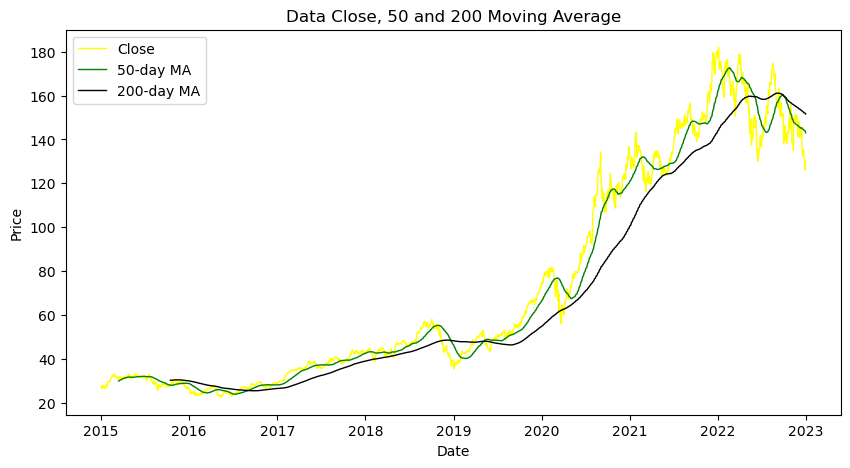

In [42]:
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Close'], label='Close', linewidth=1.0, color='yellow')
plt.plot(data.index, data['50_MA'], label='50-day MA', linewidth=1.0, color='green')
plt.plot(data.index, data['200_MA'], label='200-day MA', linewidth=1.0, color='black')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Data Close, 50 and 200 Moving Average')
plt.legend()
plt.show()

## Splitting the dataset into test and train

In [44]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.2, random_state=42)

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [46]:
classifiers = {
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'XGBoost': XGBClassifier()
}
# Train and evaluate classifiers for Strategy-1
for name, clf in classifiers.items():
    clf.fit(X_train, y1_train)
    accuracy = clf.score(X_test, y1_test)
    print(f'{name} Classifier Accuracy (Strategy-1): {accuracy:.2f}')
# Train and evaluate classifiers for Strategy-2
for name, clf in classifiers.items():
    clf.fit(X_train, y2_train)
    accuracy = clf.score(X_test, y2_test)
    print(f'{name} Classifier Accuracy (Strategy-2): {accuracy:.2f}')

KNN Classifier Accuracy (Strategy-1): 0.52
Random Forest Classifier Accuracy (Strategy-1): 0.51
Gradient Boosting Classifier Accuracy (Strategy-1): 0.48
SVM Classifier Accuracy (Strategy-1): 0.54
XGBoost Classifier Accuracy (Strategy-1): 0.47
KNN Classifier Accuracy (Strategy-2): 0.99
Random Forest Classifier Accuracy (Strategy-2): 0.99
Gradient Boosting Classifier Accuracy (Strategy-2): 0.99
SVM Classifier Accuracy (Strategy-2): 0.92
XGBoost Classifier Accuracy (Strategy-2): 1.00


## Hyper tunning the models

In [47]:
# Perform hyperparameter tuning for one classifier (e.g., Random Forest)
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_classifier = RandomForestClassifier()
# Perform Grid Search CV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y1_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train classifier with best parameters
best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(X_train, y1_train)
accuracy = best_rf_classifier.score(X_test, y1_test)
print(f'Best Random Forest Classifier Accuracy (Strategy-1): {accuracy:.2f}')


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Random Forest Classifier Accuracy (Strategy-1): 0.49
